In [1]:
import secrets

import mrcnn.config
import mrcnn.model
import mrcnn.visualize
import orchard.dataset
import orchard.config
import orchard.utils

Using TensorFlow backend.


In [2]:
# Testing dataset
dataset_test = orchard.dataset.OrchardDataset()
dataset_test.load(orchard.config.OrchardConfig.ORCHARD_DATASET_PATH, 'apples', 'test')
dataset_test.prepare()

INFO: skipping image /home/demo/dataset/apples/images/20130320T004351.801805.Cam6_43.png: no annotations to process
INFO: skipping image /home/demo/dataset/apples/images/20130320T004418.849875.Cam6_21.png: no annotations to process
INFO: skipping image /home/demo/dataset/apples/images/20130320T004432.183517.Cam6_31.png: no annotations to process
INFO: skipping image /home/demo/dataset/apples/images/20130320T004528.184672.Cam6_11.png: no annotations to process
INFO: skipping image /home/demo/dataset/apples/images/20130320T004609.899802.Cam6_51.png: no annotations to process
INFO: skipping image /home/demo/dataset/apples/images/20130320T004628.566938.Cam6_52.png: no annotations to process
INFO: skipping image /home/demo/dataset/apples/images/20130320T005446.672459.Cam6_11.png: no annotations to process
INFO: skipping image /home/demo/dataset/apples/images/20130320T005448.958130.Cam6_63.png: no annotations to process


In [3]:
# Inference configuration
inference_config = orchard.config.InferenceConfig()
#inference_config.display()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


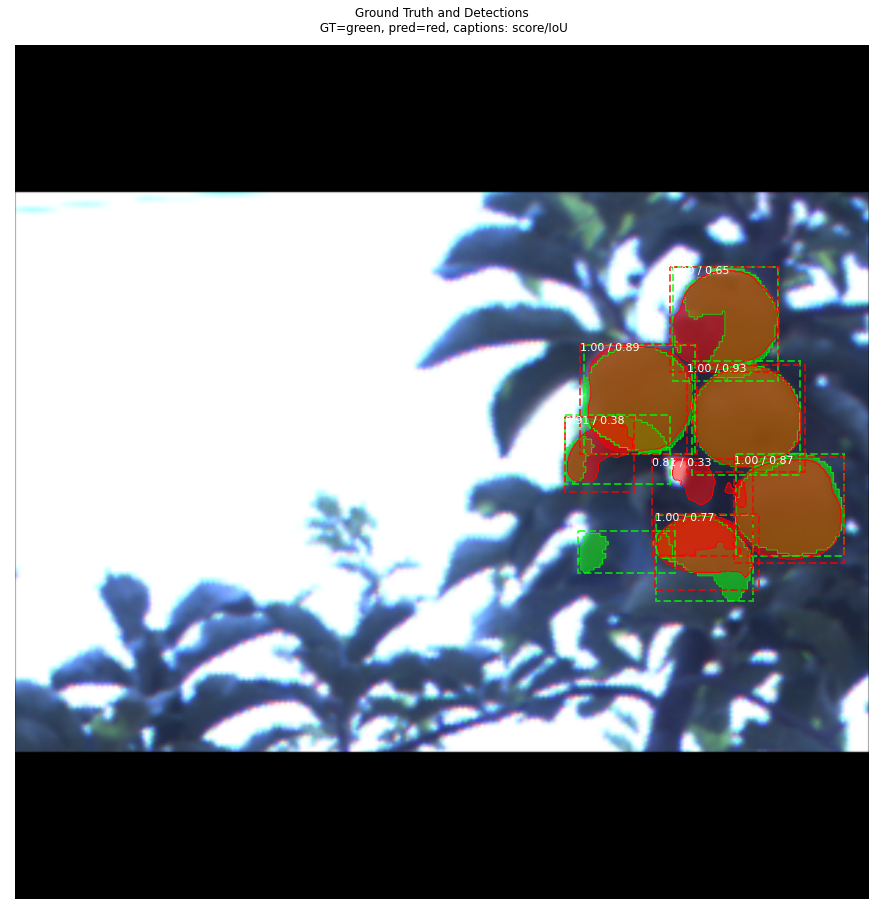

In [4]:
# Create the model in inference mode and load weights
model = mrcnn.model.MaskRCNN(
    mode='inference',
    config=inference_config,
    model_dir=inference_config.LOGS_PATH)
orchard.utils.load_weights(model, inference_config.ORCHARD_WEIGHTS_PATH)

# Test on a random image
image_id = secrets.choice(dataset_test.image_ids)
image, _, gt_class_id, gt_bbox, gt_mask = mrcnn.model.load_image_gt(
    dataset_test,
    inference_config,
    image_id,
    use_mini_mask=False)

results = model.detect([image])
r = results[0]

mrcnn.visualize.display_differences(
    image,
    gt_bbox, gt_class_id, gt_mask,
    r['rois'], r['class_ids'], r['scores'], r['masks'],
    dataset_test.class_names)